### Imports

In [1]:
from IA2_skeleton_code import * # import functions and libraries
import time

### Current state of skeleton code

In [2]:
!pygmentize IA2_skeleton_code.py

# AI534 IA2, Group 50: Vy Bui, Sebastian Mueller, Derek Helms

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plot styling
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.style.use('ggplot')
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams["legend.edgecolor"] = 'black'
plt.rcParams["legend.fontsize"] = 13

# Define dictionaries (training data vals for normalizing)
mu_dict = {}
sigma_dict = {}

# Loads a data file from a provided file location.
def load_data(path):
    return pd.read_csv(path)
    
# Implements dataset preprocessing. For this assignment, you just need to implement normalization 
# of the three numerical features.
def preprocess_data(data):
    numFeats = ["Age", "Annual_Premium", "Vintage"]
    preprocessed_data = data.copy() # copy so raw data not altered
    
    if len(mu_dict) == 0:
        for col in numFeats:
            mu_dict[col] = data[col].mean()
            sigma_dict

#### Import & normalize data

In [3]:
# Cal skeleton code functions for data
train_raw = load_data("IA2-train.csv")
val_raw = load_data("IA2-dev.csv")

train_norm = preprocess_data(train_raw)
val_norm = preprocess_data(val_raw)

## Part 3: LR with L1 norm

In [73]:
def LR_L1_train(train_data, val_data, _lambda, lr): 
    # Seperate training and validation data into X and y data frames
    features = train_data.columns.drop("Response")
    X_train = train_data[features]
    y_train = train_data["Response"].to_frame()
    X_val = val_data[features]
    y_val = val_data["Response"].to_frame()
    
    # Initialize weights
    N = len(X_train) # number of observations
    d = len(X_train.columns.values) # number of features
    w_init = (np.ones(d)*0.2).reshape(d,1)
    weights = w_init
    
    # Lists containing training and validation accuracy at each iteration
    train_acc = []
    val_acc = []
    grad_vals = []
    threshold = 0.50 # threshold for predicting class (1 if >=, 0 if <)
    
    # Set flag to check for convergence (used to continue training)
    converged = False
    epsilon = 0.00005 # found through experimenting (might need to be changed for large lambda?)
    
    # Create sigmoid function
    sigmoid = lambda wTx: 1/(1+np.exp(-wTx)) 
    
    # Traing model while not converged
    while not converged:
        # Update weights
        gradW = X_train.T.dot(y_train - sigmoid(X_train.dot(weights)).rename(columns={0:"Response"}))
        weights = (weights + lr*(1/N)*gradW).values
        
        # Apply L1 regularization
        for j in range(1,d):
            weights[j] = (np.sign(weights[j]))*max(0,np.abs(weights[j])-lr*_lambda)
            
        # Train accuracy (before or after weights update?)
        ypredT = y_train - (sigmoid(X_train.dot(weights)).rename(columns={0:"Response"}) >= threshold).astype(int)
        tAcc = (ypredT == 0).sum()[0] / N
        train_acc.append(tAcc)
        
        # Val accuracy (before or after weights update?)
        ypredV = y_val - (sigmoid(X_val.dot(weights)).rename(columns={0:"Response"}) >= threshold).astype(int)
        vAcc = (ypredV == 0).sum()[0] / len(X_val)
        val_acc.append(vAcc)
            
        # Check for convergence 
        magLw = np.linalg.norm(gradW.values)/N # magnitude of gradient (change in weights)
        grad_vals.append(magLw)
        # Check for difference between cur and past gradient, if minimal change then model has converged
        if (len(grad_vals) > 2) and (abs(grad_vals[-1] - grad_vals[-2]) < epsilon):
            print("Model Converged, lambda:", _lambda)
            converged = True # set model to converged, return weights and train/val acc
    
    print("Learn Rate:", lr)
    print("Train Acc:", train_acc[-1])
    print("Val Acc:", val_acc[-1])
    print("")
    return weights, train_acc, val_acc

### Training with L1

In [76]:
_lambdas = [10**(x) for x in range(-4,3)] # generate values of lambda 10^i, i in [-4,2]
lrs = [0.01, 0.03, 0.02, 0.08, 0.08, 0.5, 0.0001] # Learning rates that work best for corresponding lambda

train_acc_lmb = {} # dictionary to store train acc at each iteration for all models, indexed by lambda
val_acc_lmb = {} # dictionary to store val acc at each iteration for all models, indexed by lambda
train_w_lmb = {} # dictionary to store weights for all models, indexed by learning rate

for lmbd, lr in zip(_lambdas, lrs):
    tmpW, tmpTA, tmpVA = LR_L1_train(train_norm, val_norm, lmbd, lr) # train model with current lambda value
    train_acc_lmb[str(lmbd)] = tmpTA # store training accuracy, indexed by lambda value
    val_acc_lmb[str(lmbd)] = tmpVA # store val accuracy, indexed by lambda value
    train_w_lmb[str(lmbd)] = tmpW # store final training weights, indexed by lambda value

Model Converged, lambda: 0.0001
Learn Rate: 0.01
Time: 10.673 sec
Train Acc: 0.7768333333333334
Val Acc: 0.78

Model Converged, lambda: 0.001
Learn Rate: 0.03
Time: 7.594 sec
Train Acc: 0.7806666666666666
Val Acc: 0.7828

Model Converged, lambda: 0.01
Learn Rate: 0.02
Time: 8.482 sec
Train Acc: 0.7808333333333334
Val Acc: 0.7839

Model Converged, lambda: 0.1
Learn Rate: 0.08
Time: 0.181 sec
Train Acc: 0.6985
Val Acc: 0.6989

Model Converged, lambda: 1
Learn Rate: 0.08
Time: 0.192 sec
Train Acc: 0.49533333333333335
Val Acc: 0.4934

Model Converged, lambda: 10
Learn Rate: 0.5
Time: 0.249 sec
Train Acc: 0.5046666666666667
Val Acc: 0.5066

Model Converged, lambda: 100
Learn Rate: 0.0001
Time: 0.219 sec
Train Acc: 0.49533333333333335
Val Acc: 0.4934



## 3a. Plot train/val acc for lambda

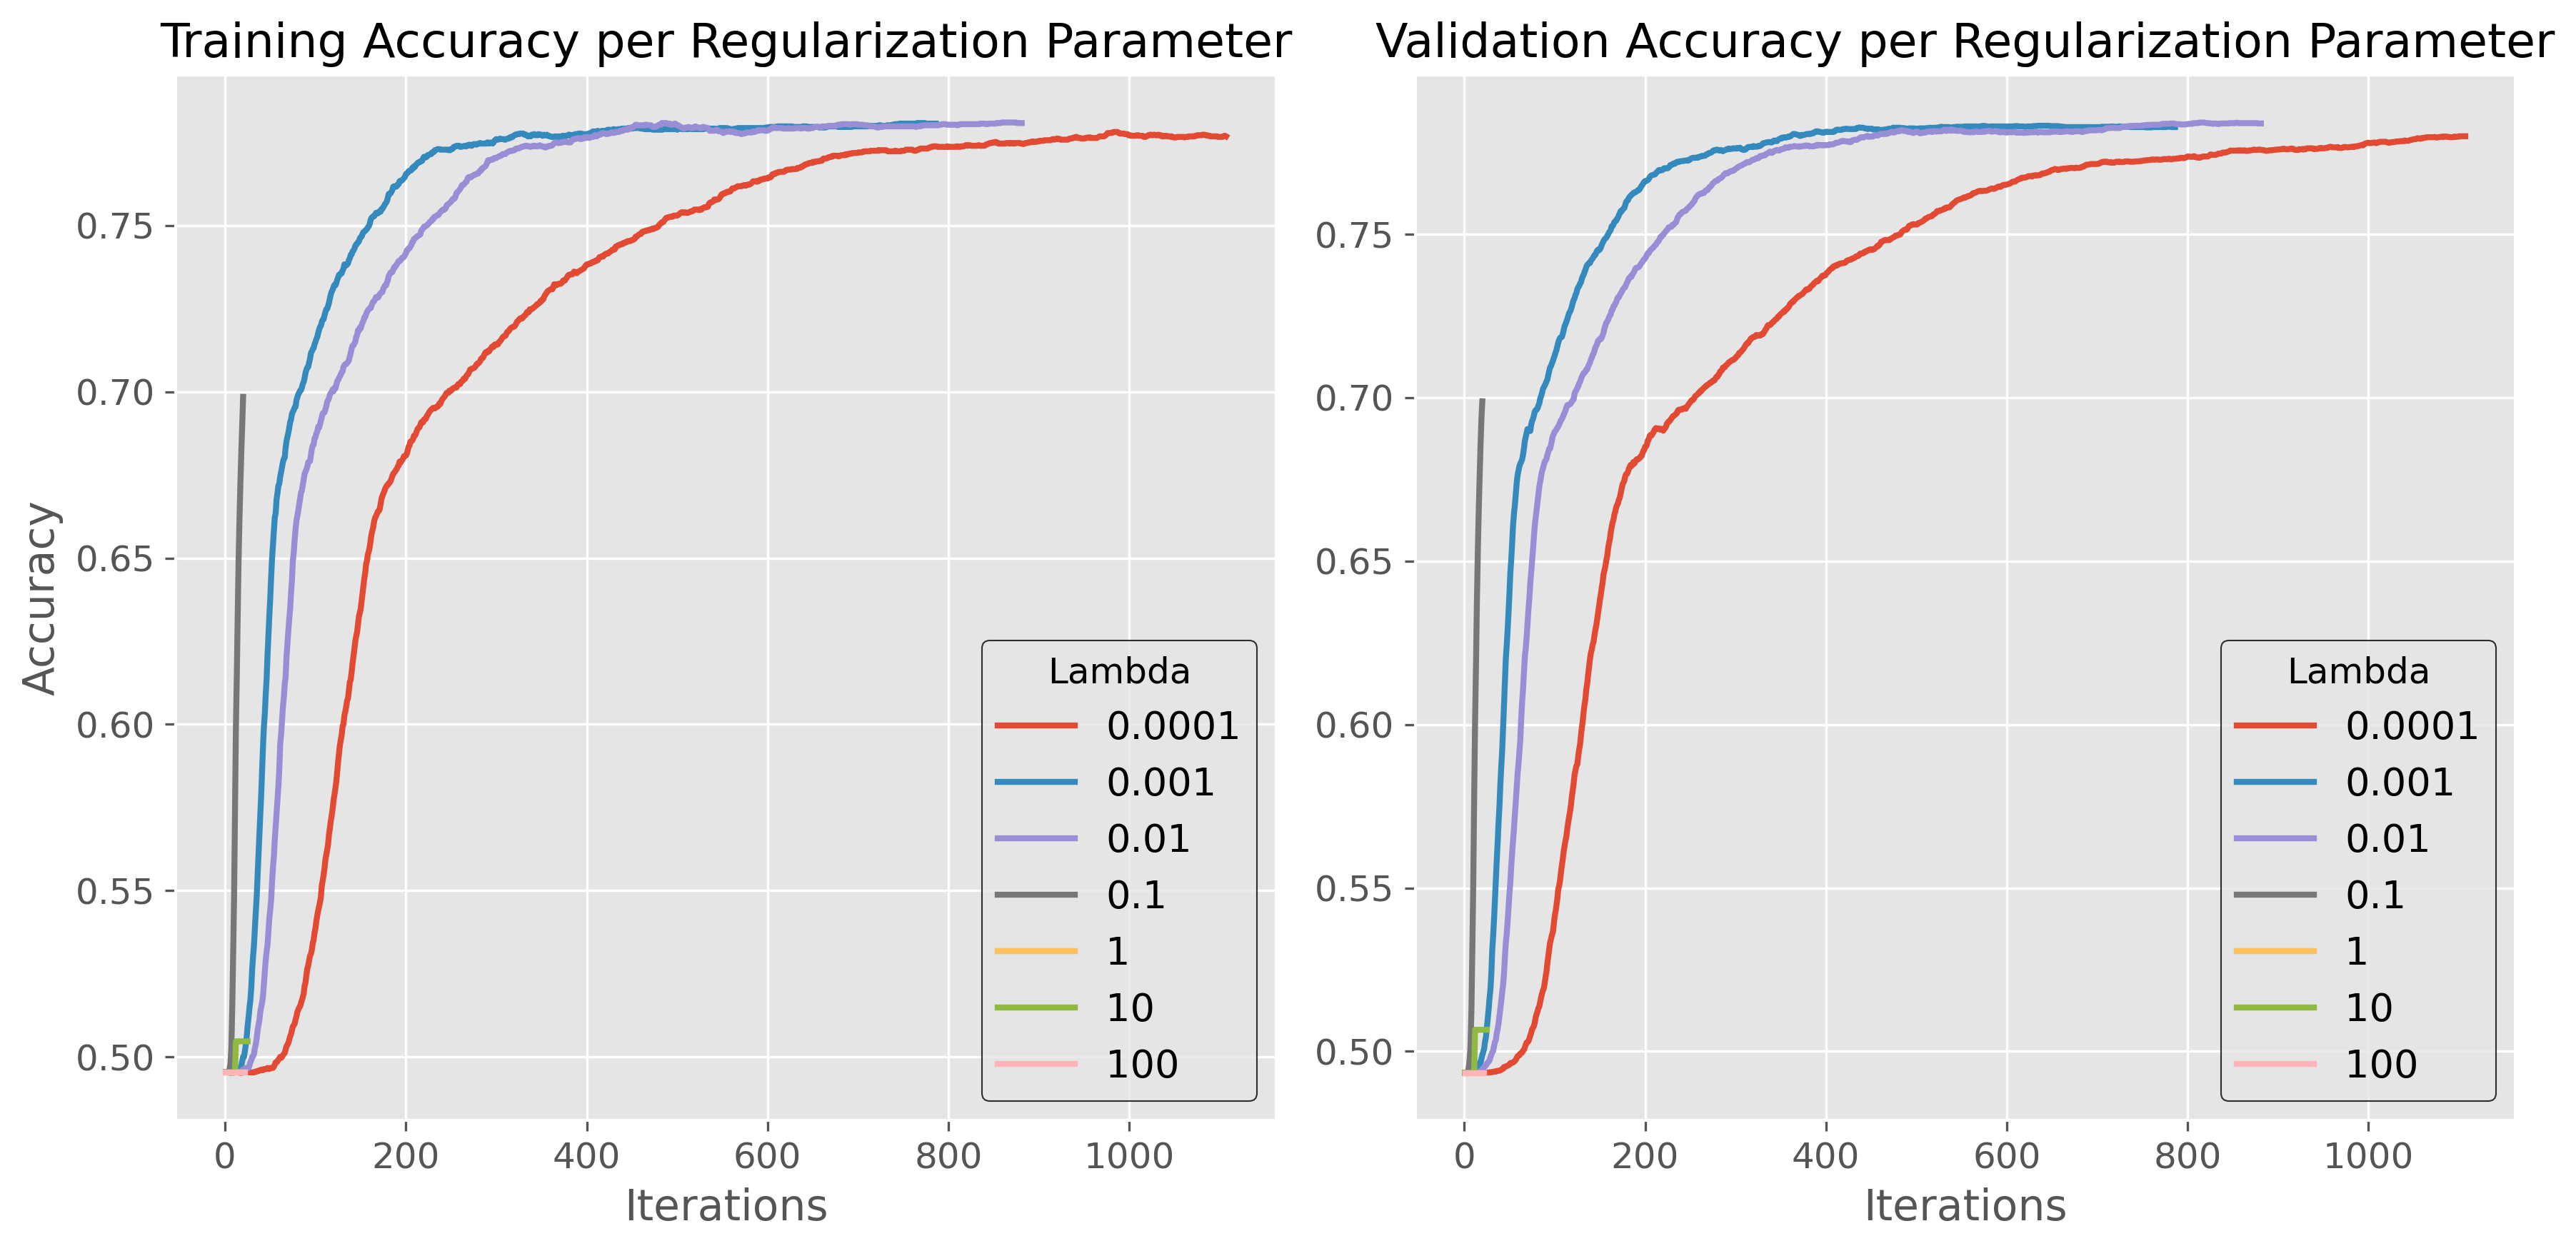

In [77]:
# Notebook only function, doesnt save plot
def plot_losses(tAccDict, vAccDict):
    fig = plt.figure(figsize=(12,6))
    
    # Plot training accuracy (left subplot)
    ax1 = plt.subplot(1,2,1)
    for lmbda, acc in tAccDict.items():
        plt.plot(np.arange(1,len(acc)+1), acc, label=lmbda, linewidth=2)
    plt.legend(title="Lambda")   
    plt.xlabel("Iterations")
    plt.title('Training Accuracy per Regularization Parameter')
    plt.ylabel('Accuracy')
    
    # Plot validation accuracy (right subplot)
    ax2 = plt.subplot(1,2,2)
    for lmbda, acc in vAccDict.items():
        plt.plot(np.arange(1,len(acc)+1), acc, label=lmbda, linewidth=2)
    plt.legend(title="Lambda")   
    plt.xlabel("Iterations")
    plt.title('Validation Accuracy per Regularization Parameter')
    # Show and save plot
    plt.tight_layout()
    plt.show()
    return

plot_losses(train_acc_lmb, val_acc_lmb)

- The typical trend is that smaller values of lambda lead to models that can predict well on the data, while the larger values of lambda leads to models that have either lower or no predition capabilities.
- The larger the lambda value, the more likely we are underfitting our data (as we can see from the above graphs). The smaller the lambda value, the better our predictions become but also can lead to overfitting (doesn't seem to be the case here, since train acc ~ val acc).
- Validation accuracy for our model follows similar patterns to the train data, at some points dipping down a bit, but in general similar distributions.
- The best value of lambda on the validation data was 0.01, which had an accuracy of approx 78.39%. The learning rate used to acheive this was 0.02 (see `SampleLR_Select.jpg` on how rates were chosen for each lambda value - shows how I chose learning rate = 0.05 for lambda = 0.0001).
- For the life of me I could not get lambda = 1, 10, or 100 to change accuracy from approx 50% (random guessing). My intuition is that the lambda is so large that the weights are learning nothing, and hence they are equivalent to random guessing? I tried values from 0.000001 up to 1 (random, but a lot of them) and nothing would make it budge. Will need to look into this depending on what Vy finds.

## 3b. $\lambda_{-}$ and $\lambda_{+}$ around best $\lambda$

The best lambda value was 0.1, so using the one below and above from the above code should be fine.

In [85]:
tmp = pd.DataFrame({"Features": train_norm.columns.drop("Response").values,
              "Weights": train_w_lmb['0.001'].reshape(197),
              "AbsW": abs(train_w_lmb['0.001'].reshape(197))})
print("Lambda- = 0.001")
tmp.iloc[1:].sort_values(by=["AbsW"], ascending=False).drop(columns=["AbsW"]).iloc[:5]

Lambda- = 0.001


,Features,Weights
4,Previously_Insured,-1.257391
5,Vehicle_Damage,1.144427
187,Policy_Sales_Channel_152,-0.393542
3,Driving_License,-0.392308
62,Vehicle_Age_1,-0.382580


In [86]:
tmp = pd.DataFrame({"Features": train_norm.columns.drop("Response").values,
              "Weights": train_w_lmb['0.01'].reshape(197),
              "AbsW": abs(train_w_lmb['0.01'].reshape(197))})
print("Lambda = 0.01")
tmp.iloc[1:].sort_values(by=["AbsW"], ascending=False).drop(columns=["AbsW"]).iloc[:5]

Lambda = 0.01


,Features,Weights
4,Previously_Insured,-0.990252
5,Vehicle_Damage,0.939625
187,Policy_Sales_Channel_152,-0.291322
62,Vehicle_Age_1,-0.284638
164,Policy_Sales_Channel_124,0.169089


In [87]:
tmp = pd.DataFrame({"Features": train_norm.columns.drop("Response").values,
              "Weights": train_w_lmb['0.1'].reshape(197),
              "AbsW": abs(train_w_lmb['0.1'].reshape(197))})
print("Lambda+ = 0.1")
tmp.iloc[1:].sort_values(by=["AbsW"], ascending=False).drop(columns=["AbsW"]).iloc[:5]

Lambda+ = 0.1


,Features,Weights
2,Age,0.109821
5,Vehicle_Damage,0.094218
63,Vehicle_Age_2,0.046124
192,Policy_Sales_Channel_157,0.045359
191,Policy_Sales_Channel_156,0.042267


For all 3 values of lambda, there is only one repeated feature shared between them all: Vehicle_Damage. The $\lambda$ and $\lambda_{-}$ models both share there top 3 features (with different values), as well as both containing Vehicle_Age_1 in different positions. The top 5 features have much higher importance for the $\lambda$ and $\lambda_{-}$ models compared to $\lambda_{+}$, which I would relate to the fact that the first 2 reached high training accuracy (~78%), while lambda = 0.1 ($\lambda_{+}$) only reached ~70%.

## 3c. Sparsity of $\lambda$  = 0.001

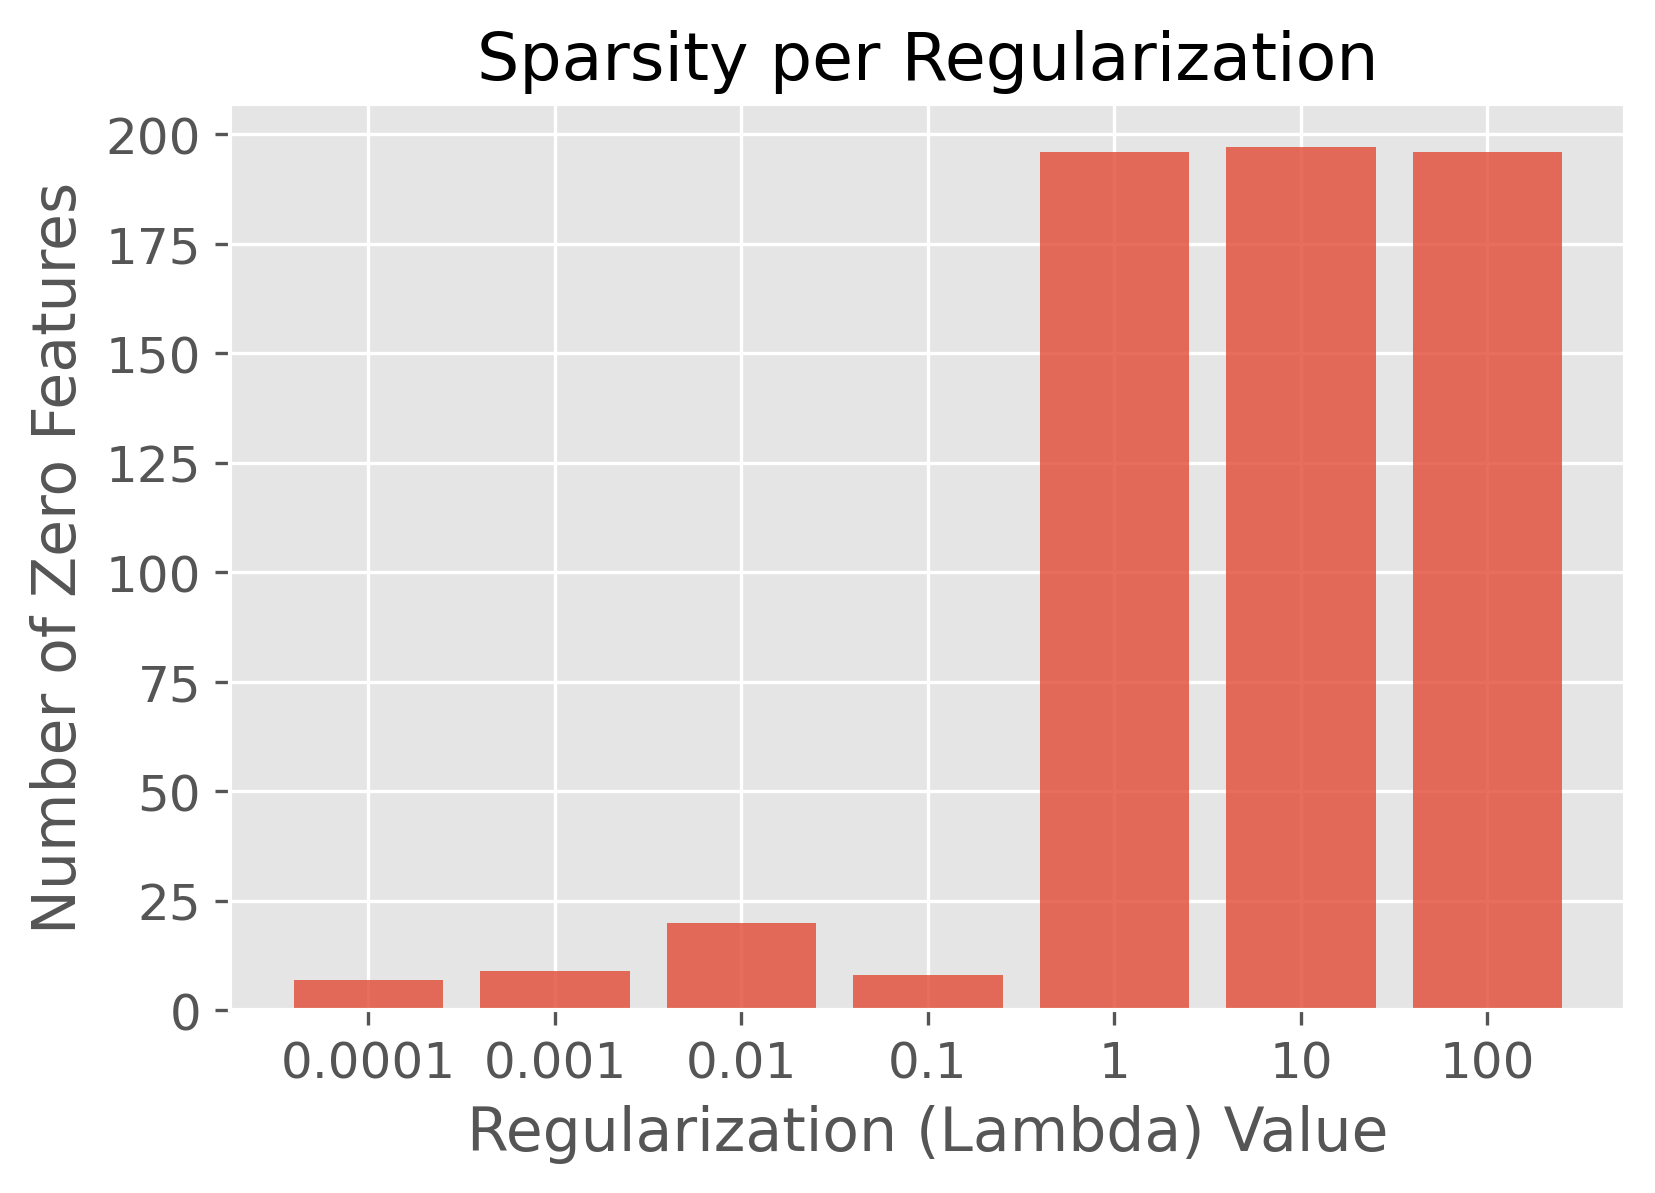

In [90]:
def sparsity_graph(train_weights, pName):   
    plt.figure(figsize=(6,4))
    nZeros = [(train_weights[lbl].reshape(197) <= 10**(-6)).sum() for lbl in train_w_lmb.keys()]
    lmbLabel = list(train_weights.keys())
    plt.bar(lmbLabel, nZeros, align='center', alpha=0.8)
    plt.ylabel('Number of Zero Features')
    plt.xlabel("Regularization (Lambda) Value")
    plt.title('Sparsity per Regularization')
    plt.savefig(pName)
    
sparsity_graph(train_w_lmb, "SparsityL1.jpg")

The models all seemed to have low sparsity until lambda >= 1 (this is where all weights began to go to zero no matter what learning rate I chose). An important note might be that 0.01 has a higher sparsity than the other models that reached a similar accuracy, with 20 zero features.